<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 01:  Numpy, Pandas, and visualization**

## **Outline**

1. [Ejercicio 1. Numpy](#eje1)
2. [Ejercicio 2. Numpy](#eje2)
2. [Ejercicio 3. Pandas](#eje3)
2. [Ejercicio 4. Pandas](#eje4)
2. [Ejercicio 5. Seaborn](#eje5)



In [2]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
#@markdown Recuerde estar en la ubicación de su repositorio.

#@markdown Utilice ```os.chdir``` para localizar el directorio
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20211')
#os.chdir('/content/drive/My Drive/main/academic/courses/2018-UIS-AritfitialInteligence/ai-uis-student/talleres20202')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student/talleres20211



---
#### Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.
---

# **Ejercicio 1**  <a name="eje1"></a>

Contruya una función, que retorne una matriz $N \times N$, siguiendo las siguientes instrucciones. 

- La función debe recibir el parametro $N$ que indicará el tamaño de la matriz.
- La función debe recibir el parametro $F$ que indica los valores, en general, de la matriz.
- Los valores justo debajo de la diagonal deben ser numéros sucesivos, como ` [F+1,F+2,F+3,F+4, ....]`
- Calcule la media a nivel de columnas y el máximo a nivel de filas. 



In [12]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas
def fun_11091120(N, F):
    import numpy as np 
    mat = np.full((N,N),F)
    z=1
    for i in range(1,N):
      mat[i,i-1] += z
      z += 1
    means = np.ndarray((1,N))
    for i in range(N):
      means[0,i]=np.mean(mat[:,1])
    maxs  = np.ndarray((1,N))
    for i in range(N):
      maxs[0,i]=np.max(mat[i,:])
    return mat, means, maxs
    return Z, means, maxs

import urllib.parse, inspect
src11091120 = urllib.parse.quote_plus(inspect.getsource(fun_11091120))

In [13]:
#@title **verifique su respuesta**
import numpy as np
mat, means, maxs = fun_11091120(5, 3)
print("matriz:\n ", mat)
print("means:\n ", means)
print("maxs:\n ", maxs)

matriz:
  [[3 3 3 3 3]
 [4 3 3 3 3]
 [3 5 3 3 3]
 [3 3 6 3 3]
 [3 3 3 7 3]]
means:
  [[3.4 3.4 3.4 3.4 3.4]]
maxs:
  [[3. 4. 5. 6. 7.]]


In [14]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS1_11091120 $src11091120

evaluation result CORRECT


# **Ejercicio 2**  <a name="eje2"></a>

Construya una matrix  binaria que permita construir un patron de ajedrez de tamaño $N\times N$. 

- Retorne el número de unos
- Retorne la matriz $N\times N$. 

In [15]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas
def fun_12091120(N):
    import numpy as np 
    mat = np.zeros((N, N))
    mat[::2, 1::2] = 1
    mat[1::2, ::2] = 1
    count_board = np.count_nonzero(mat==1)
    return count_board, mat

import urllib.parse, inspect
src12091120 = urllib.parse.quote_plus(inspect.getsource(fun_12091120))

ones:  98


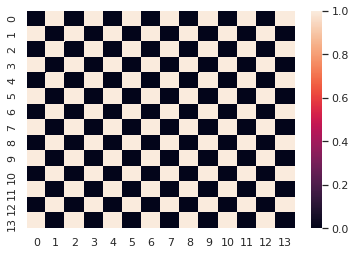

In [16]:
#@title **verifique su respuesta**
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
count, mat = fun_12091120(14)
print("ones: ", count)
sns.heatmap(mat);

In [17]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS1_12091120 $src12091120

evaluation result CORRECT


---
## **Comportamiento del producto interno Bruto a nivel Mundial**

En los siguientes puntos vamos a explorar un dataset que describe el  crecimiento de la población mundial (`pop`) por país (`country`), y además describe el comportamiento del producto interno bruto (`gdpPercap`) y la experanza de vida (`lifeExp`).

---

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


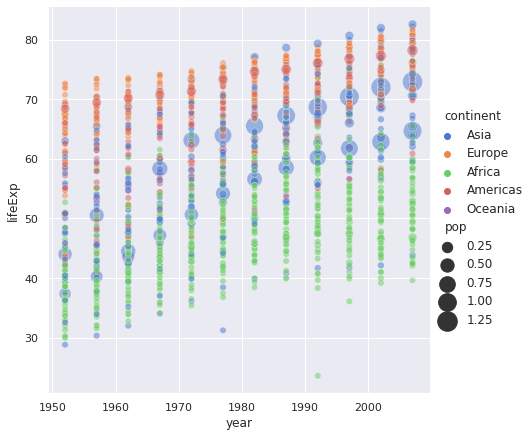

In [ ]:
#@title **PIB dataset**
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = pd.read_csv('misc/FiveYearData.csv')
sns.relplot(x="year", y="lifeExp", hue="continent", size="pop",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
data.head()

# **Ejercicio 3**  <a name="eje3"></a>

**Calculando nuevas caracteristicas del dataset**

Escriba una función que le agregue una columna al dataframe `data`. La nueva columna debe llamarse `corr_movil` y debe calcular la correlación movil entre las columnas `lifeExp` y `gdpPercap`. La ventana de la correlación movil debe ser calculada con una ventana de tamaño `10`. Los primeros datos serán `NaN` pero deben ser "rellenados" con el valor global de la correlación entre estas dos variables. 

La función debe devolver el datadrame `data` con la nueva columna y ademas se deve devolver la matrix de correlación general entre estas dos caracteristicas. 

In [3]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas
def fun_13101120(): 
    import numpy as np
    import pandas as pd
    
    
    data_mod = pd.read_csv('misc/FiveYearData.csv')    
    corr_mat=np.corrcoef(data_mod.lifeExp , data_mod.gdpPercap)
    data_mod["corr_movil"]=data_mod.lifeExp.rolling(window=10).corr(other=data_mod.gdpPercap)
    data_mod.corr_movil.fillna(corr_mat[0,1], inplace=True)
    
    
    return data_mod, corr_mat

import urllib.parse, inspect
src13101120 = urllib.parse.quote_plus(inspect.getsource(fun_13101120))

In [4]:
#@title **verifique su respuesta**
data_mod, corr_mat = fun_13101120()
print(corr_mat)
data_mod.head(3)

[[1.         0.58370622]
 [0.58370622 1.        ]]


,country,year,pop,continent,lifeExp,gdpPercap,corr_movil
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,0.583706
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,0.583706
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,0.583706


In [5]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS1_13101120 $src13101120

evaluation result CORRECT


# **Ejercicio 4**  <a name="eje4"></a>

**Agrupamiento.** 
Una de los mecanismos mas sofisticados para entender, analizar y visualizar los datos son los métodos de agrupamiento. Pandas ofrece varios metodos de agrupamiento como es `groupby` y `pivot_table`. Para entender mejor su potencialidad vamos a crear una función que cree y retorne dos nuevos dataframes, con la siguiente descripción: 

- Un dataframe que agrupe la información por los continentes y calcule en cada registro la operación media. 
- Un dataframe construido con `pivot_table` que permita observar mas detalladamente la información.  Esta tabla debe indexar los datos por `year`, la columna debe ser `continent` y la función que debe operar es `max` 

In [6]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas
def fun_14101120(): 
    import numpy as np
    import pandas as pd
    

    data_mod = pd.read_csv('misc/FiveYearData.csv')
    DF_cont = data_mod.groupby("continent").mean()
    pivot_t = pd.pivot_table(data_mod, columns=data_mod.continent,index=data_mod.year,aggfunc=[max])
    
    return DF_cont, pivot_t
import urllib.parse, inspect
src14101120 = urllib.parse.quote_plus(inspect.getsource(fun_14101120))

In [7]:
#@title **verifique su respuesta**
DF_cont, pivot_t = fun_14101120()
DF_cont.head(5)


,year,pop,lifeExp,gdpPercap
continent,,,,
Africa,1979.5,9.916003e+06,48.865330,2193.754578
Americas,1979.5,2.450479e+07,64.658737,7136.110356
Asia,1979.5,7.703872e+07,60.064903,7902.150428
Europe,1979.5,1.716976e+07,71.903686,14469.475533
Oceania,1979.5,8.874672e+06,74.326208,18621.609223


In [8]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS1_14101120 $src14101120

evaluation result CORRECT


# **Ejercicio 5**  <a name="eje5"></a>

Construya un Dataframe a partir de una las siguientes series.

- Una serie que tenga un arreglo de 10000 números aleatorios construidos a partir de `np.random.normal(loc=2, scale=0.7, ...)`

- Una serie que tenga un arreglo de 10000 números aleatorios construidos a partir de `np.random.normal(loc=2, scale=1.9, ...)`

- Una serie que tenga un arreglo de 10000 números  aleatorios construidos a partir de `np.random.uniform(...)`. 

- Pinte un gráfico boxplot del Dataframe (con las tres series)

- Retorne el dataFrame y el objeto `boxplot` de seaborn

In [9]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas
def fun_15091120():
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set_theme()

  nom_2= np.random.normal(loc=2,scale=0.7,size=10000)
  nom_5= np.random.normal(loc=2,scale=1.9,size=10000)
  unif = np.random.uniform(size=10000)
  dframe_box = pd.DataFrame({ 'nom_2': nom_2, 'nom_5': nom_5, 'unif':unif })
  plotboxx = sns.boxplot(data=dframe_box)
  return [dframe_box, plotboxx]

import urllib.parse, inspect
src15091120 = urllib.parse.quote_plus(inspect.getsource(fun_15091120))  

(10000, 3) <class 'matplotlib.axes._subplots.AxesSubplot'>


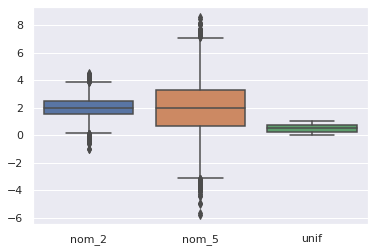

In [10]:
#@title **verifique su respuesta**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

obj = fun_15091120()
print(obj[0].shape, type(obj[1]))

In [11]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS1_15091120 $src15091120

evaluation result CORRECT


# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [18]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_01_20211" #@param {type:"string"}
codigo_name = "tl1_2173051" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_std_01_20211 tl1_2173051


In [19]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [20]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: tl1_2173051 dos Taller_std_01_20211
¡PERFECTO!, el archivo   'tl1_2173051.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>